> studi kasus: kamu diminta untuk membuat model yang dapat menentukan gejala penyakit berdasarkan keluhan yang diinputkan

# <b> Exploring Data </b>

*jalankan kode di bawah untuk memastikan bahwa library telah di download*

In [ ]:
pip install pandas numpy matplotlib scikit-learn seaborn

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [148]:
# membaca semua data data
df = pd.read_csv("PERHITUNGAN KNN DAN MKNN.csv")

df.head()

,No,RM,Nama,Tgl Lahir,Alamat,Tgl Masuk,Tgl Keluar,mual,muntah,muntah_darah,...,demam,BAB_normal,BAB_tidak_lancar,BAB_cair,BAB_Hitam,BAB_darah,flatus,lemas,nafsu_makan_menurun,Diagnosa_Utama
0,1,394117,ZAKARIA,2/5/1974,ABEUK TINGKEM JEUMPA,3/1/2021,06-01-2021(4),1,1,1,...,1,2,1,1,1,1.0,2,1,1,Abdominal Pain
1,2,340884,HABSAH,1/7/1973,PULO KITON KOTA JUANG,30-12-2020,01-01-2021 (2),2,1,1,...,1,2,1,1,1,1.0,1,1,1,Abdominal Pain
2,3,394265,DAHLAN HARUN,31-12-1955,COT TUFAH GANDA PURA,5/1/2021,08-01-2021(4),1,1,1,...,1,2,1,1,2,2.0,1,1,1,GI Haemorrhage
3,4,394292,ANWAR,11/4/1960,PADANG KASAB PLIMBANG,6/1/2021,08-01-2021(3),2,1,1,...,1,2,1,1,1,1.0,2,1,1,Abdominal Pain
4,5,334929,ZAINUDDIN,1/7/1950,GEULANGGANG LABU PEUSANGAN,24-01-2021,28-01-2021,1,1,1,...,1,1,2,1,1,1.0,2,1,2,Gastritis


berhubungan beberapa *atribut* tidak dapat dipertimbangkan oleh model, maka kita perlu menghapus beberapa *atribut* seperti No, nama, alamat, tgl lahir, dan lain sebagainya. 

In [149]:
df.drop(columns=["No", "RM", "Nama", "Tgl Lahir", "Alamat", "Tgl Masuk", "Tgl Keluar"], inplace=True)

df.head()

,mual,muntah,muntah_darah,mulut_asam,benjolan_dalam_perut,dada_panas,jantung_berdebar,nyeri_dada,sendawa,sesak,...,demam,BAB_normal,BAB_tidak_lancar,BAB_cair,BAB_Hitam,BAB_darah,flatus,lemas,nafsu_makan_menurun,Diagnosa_Utama
0,1,1,1,1,1,1,1,2,1,2,...,1,2,1,1,1,1.0,2,1,1,Abdominal Pain
1,2,1,1,1,1,1,1,1,1,1,...,1,2,1,1,1,1.0,1,1,1,Abdominal Pain
2,1,1,1,1,1,1,1,1,1,1,...,1,2,1,1,2,2.0,1,1,1,GI Haemorrhage
3,2,1,1,1,1,1,1,2,1,1,...,1,2,1,1,1,1.0,2,1,1,Abdominal Pain
4,1,1,1,1,1,1,1,1,1,1,...,1,1,2,1,1,1.0,2,1,2,Gastritis


### <b> Cleaning Data</b>

Pada tahapan ini akan pemrosesan untuk data. Seperti penanganan data yang hilang dan data yang terduplikasi. Jika tidak ditangani maka akan memengaruhi performa model yang semakin memburuk. 

In [150]:
# mengecek apakah ada data yang kosng
df.isna().sum()

mual                       0
muntah                     0
muntah_darah               0
mulut_asam                 0
benjolan_dalam_perut       0
dada_panas                 0
jantung_berdebar           0
nyeri_dada                 0
sendawa                    0
sesak                      0
nyeri_ulu_hati             0
nyeri_perut                0
perut_kembung              0
nyeri_perut_kiri           0
nyeri_perut_kanan_bawah    0
nyeri_perut_kanan_atas     0
sakit_kepala               0
pusing                     0
demam                      0
BAB_normal                 0
BAB_tidak_lancar           0
BAB_cair                   0
BAB_Hitam                  0
BAB_darah                  1
flatus                     0
lemas                      0
nafsu_makan_menurun        0
Diagnosa_Utama             0
dtype: int64

In [151]:
# mengisi data yang kosong dengan rata2
df.fillna(value=df.mode().iloc[0], inplace=True)
df["BAB_darah"] = df["BAB_darah"].astype(int)


df.isna().sum()

mual                       0
muntah                     0
muntah_darah               0
mulut_asam                 0
benjolan_dalam_perut       0
dada_panas                 0
jantung_berdebar           0
nyeri_dada                 0
sendawa                    0
sesak                      0
nyeri_ulu_hati             0
nyeri_perut                0
perut_kembung              0
nyeri_perut_kiri           0
nyeri_perut_kanan_bawah    0
nyeri_perut_kanan_atas     0
sakit_kepala               0
pusing                     0
demam                      0
BAB_normal                 0
BAB_tidak_lancar           0
BAB_cair                   0
BAB_Hitam                  0
BAB_darah                  0
flatus                     0
lemas                      0
nafsu_makan_menurun        0
Diagnosa_Utama             0
dtype: int64

In [152]:
df["mual"].value_counts()

mual
2    185
1     78
Name: count, dtype: int64

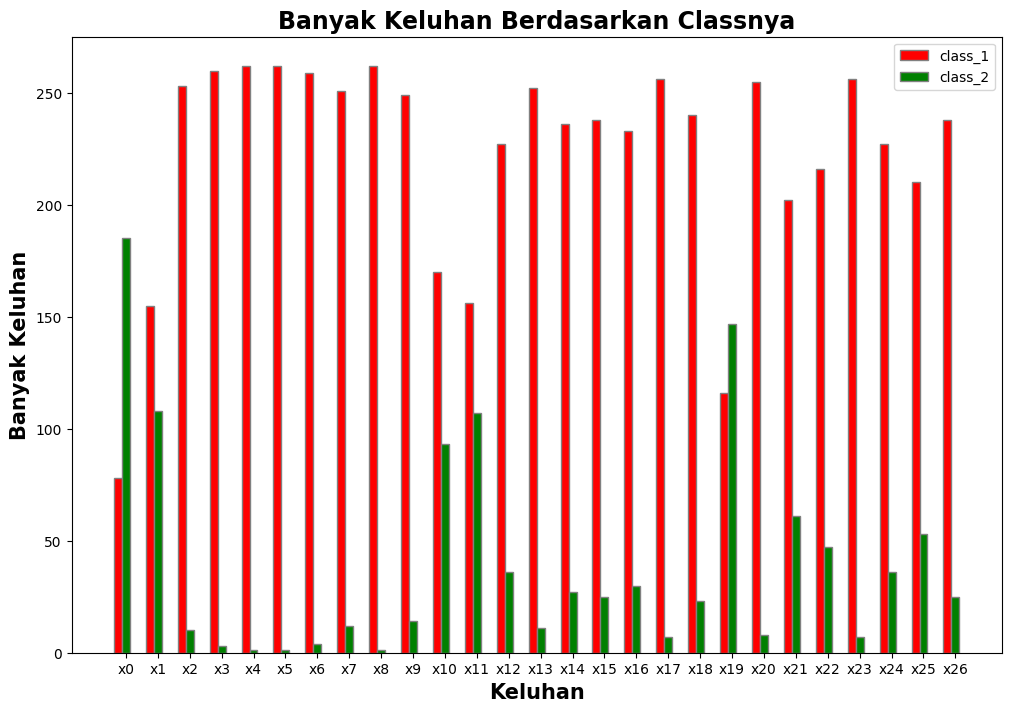

In [153]:
# Mengambil kolom dari masing masing kategori
columns = df.columns[:-1]
type1 = [df[col].value_counts()[1] for col in columns]
type2 = [df[col].value_counts()[2] for col in columns]

# menentukan lebar bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

# menentukan posisi bar
br1 = np.arange(len(type1)) 
br2 = [x + barWidth for x in br1] 

plt.bar(br1, type1, color ='r', width = barWidth, 
        edgecolor ='grey', label ='class_1') 
plt.bar(br2, type2, color ='g', width = barWidth, 
        edgecolor ='grey', label ='class_2') 

plt.title("Banyak Keluhan Berdasarkan Classnya",  fontweight ='bold', fontsize = 17)
plt.xlabel('Keluhan', fontweight ='bold', fontsize = 15) 
plt.ylabel('Banyak Keluhan', fontweight ='bold', fontsize = 15) 

plt.xticks([r + barWidth for r in range(len(type1))], ["x" + str(i) for i in range(len(columns))])
plt.legend()

dari grafik di atas, dapat menunjukkan bahwa kecenderungan pada masing masing *atribut* jauh lebih banyak yang jarang ada keluhannnya

In [154]:
df["Diagnosa_Utama"].value_counts().values

array([48, 48, 45, 35, 28, 26, 21, 11,  1], dtype=int64)

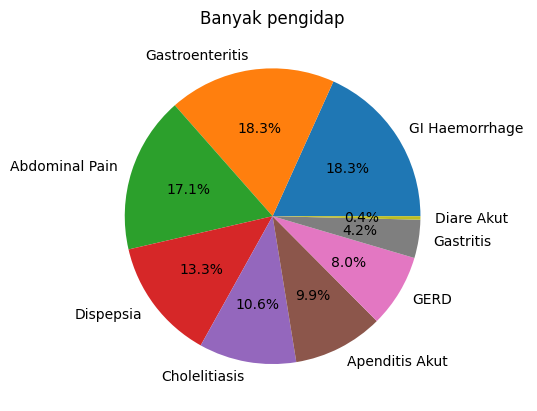

In [155]:
# Mendapat data berdasar nilai unik
jenis_diagnosis = df["Diagnosa_Utama"].value_counts().keys()
banyak_didiagnosa = df["Diagnosa_Utama"].value_counts().values

# menunjukkan data
plt.title("Banyak pengidap")
plt.pie(
    banyak_didiagnosa,
    labels=jenis_diagnosis,
    autopct='%1.1f%%'
)

plt.show()

Berdasarkan dari data di atas kita dapat melihat bahwa yang mengidap penyakit yang paling tinggi adalah dengan diagnosis Abdominal Pain yang mana persentase yang paling tinggi. Sedangkan yang terkecil adalah diare akut. Hal ini akan memengaruhi dari hasil model nantinya karena jumlah keseimbangan data yang sedikit berbeda akan menimbulkan terjadinya overfitting. Model lebih sulit untuk menebak kategori yang jumlah datanya sedikit, dan justru lebih bisa menebak kategori yang jumlah datanya banyak.

karena kita mempertimbangkan untuk tidak menggunakan diare akut, karena jumlah datanya yang sedikit, maka kita mampu menghapusnya

In [156]:
df = df[~(df["Diagnosa_Utama"] == "Diare Akut")]

In [157]:
# melihat apakah ada data yang terduplikat
df[df.duplicated()]

,mual,muntah,muntah_darah,mulut_asam,benjolan_dalam_perut,dada_panas,jantung_berdebar,nyeri_dada,sendawa,sesak,...,demam,BAB_normal,BAB_tidak_lancar,BAB_cair,BAB_Hitam,BAB_darah,flatus,lemas,nafsu_makan_menurun,Diagnosa_Utama
33,2,1,1,1,1,1,1,1,1,1,...,1,2,1,1,1,1,2,1,1,Apenditis Akut
42,2,2,1,1,1,1,1,1,1,1,...,1,1,1,2,1,1,1,1,1,Gastroenteritis
43,2,1,1,1,1,1,1,1,1,1,...,1,2,1,1,1,1,1,1,1,Abdominal Pain
54,2,1,1,1,1,1,1,1,1,1,...,1,2,1,1,1,1,1,1,1,Abdominal Pain
66,2,2,1,1,1,1,1,1,1,1,...,2,1,1,2,1,1,1,1,1,Gastroenteritis
83,2,2,1,1,1,1,1,1,1,1,...,1,1,1,2,1,1,1,2,1,Gastroenteritis
86,2,1,1,1,1,1,1,1,1,1,...,1,2,1,1,1,1,1,1,1,Abdominal Pain
93,1,2,1,1,1,1,1,1,1,1,...,1,1,1,2,1,1,1,1,1,Gastroenteritis
109,1,2,1,1,1,1,1,1,1,1,...,1,1,1,2,1,1,1,1,1,Gastroenteritis
110,2,1,1,1,1,1,1,1,1,1,...,1,2,1,1,1,1,1,1,1,Abdominal Pain


In [158]:
df.shape

(262, 28)

In [159]:
df.drop_duplicates(inplace=True)

df[df.duplicated()]

,mual,muntah,muntah_darah,mulut_asam,benjolan_dalam_perut,dada_panas,jantung_berdebar,nyeri_dada,sendawa,sesak,...,demam,BAB_normal,BAB_tidak_lancar,BAB_cair,BAB_Hitam,BAB_darah,flatus,lemas,nafsu_makan_menurun,Diagnosa_Utama


berdasarkan dari grafik di atas, jelas bahwa ada data yang terduplikasi, yang akhirnya dihilangkan data yang menduplikat

In [160]:
df.shape

(216, 28)

### <b>Training dan Testing</b>

In [161]:
# menentukan data x dan data y
x = df.drop(columns="Diagnosa_Utama")
y = df["Diagnosa_Utama"].map({ col:i+1 for i, col in enumerate(df["Diagnosa_Utama"].unique())})


# untuk melakukan splitting
def Train_test_split(x, y, random_seed=None, test_size=0.7):
    if random_seed:
        np.random.seed(random_seed)

    # membagi atau men slice
    test_size = int(test_size * x.shape[0]) 
    indices = np.random.permutation(x.shape[0]) 
    train_indices, test_indices = indices[:test_size], indices[test_size:] 
    return x.iloc[train_indices], x.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices] 

X_train, X_test, y_train, y_test = Train_test_split(x, y, 123, 0.8)
X_train

,mual,muntah,muntah_darah,mulut_asam,benjolan_dalam_perut,dada_panas,jantung_berdebar,nyeri_dada,sendawa,sesak,...,pusing,demam,BAB_normal,BAB_tidak_lancar,BAB_cair,BAB_Hitam,BAB_darah,flatus,lemas,nafsu_makan_menurun
196,2,1,1,1,1,1,1,2,1,1,...,1,1,2,1,1,1,1,2,1,1
241,2,2,1,1,1,1,1,1,1,2,...,1,1,2,1,1,1,1,1,1,1
31,1,1,1,1,1,1,1,1,1,1,...,1,1,2,1,1,1,1,1,1,1
141,1,2,1,1,1,1,1,1,1,1,...,1,1,2,2,1,1,1,1,2,2
101,1,1,1,1,1,1,1,1,1,1,...,1,1,2,1,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,2,1,1,2,1,1
74,1,1,2,1,1,1,1,1,1,1,...,1,1,1,1,1,2,1,1,1,1
249,2,1,1,1,1,1,1,1,1,2,...,1,1,2,1,1,1,1,1,1,2
144,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [162]:
# library yang penting
from KNN import KNN
from MKNN import MKNN
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# mencoba beberapa alternatif untuk nilai akurasi
accuracy = {}
for k in range(3, 15):
    modelKNN = KNN(n_neighbors=k)
    modelKNN.fit(X_train, y_train)
    y_predict = modelKNN.predict(X_test)
    accuracy[k] = accuracy_score(y_test, y_predict)

accuracy

{3: 0.6590909090909091,
 4: 0.5681818181818182,
 5: 0.6818181818181818,
 6: 0.6590909090909091,
 7: 0.6363636363636364,
 8: 0.6363636363636364,
 9: 0.6363636363636364,
 10: 0.6818181818181818,
 11: 0.6818181818181818,
 12: 0.6590909090909091,
 13: 0.6590909090909091,
 14: 0.7045454545454546}

berdasarkan dari hasil di atas, jelas bahwa jumlah k yang paling optimal adalah *14*. Maka kita akan menjadikan *k=14* untuk menjadi acuan

In [163]:
modelKNN = KNN(n_neighbors=14, metric="cosine")
modelKNN.fit(X_train, y_train)
y_predict = modelKNN.predict(X_test)
print("cosine", accuracy_score(y_test, y_predict))


modelKNN = KNN(n_neighbors=14, metric="hamming")
modelKNN.fit(X_train, y_train)
y_predict = modelKNN.predict(X_test)
print("hamming",accuracy_score(y_test, y_predict))

cosine 0.6590909090909091
hamming 0.7272727272727273


ketika melihat hasil dari set parameter untuk metric, dapat ditemukan bahwa dengan menggunakan metric *hamming* akan semakin menjadi lebih baik. Maka parameter yang di set adalah *hamming*

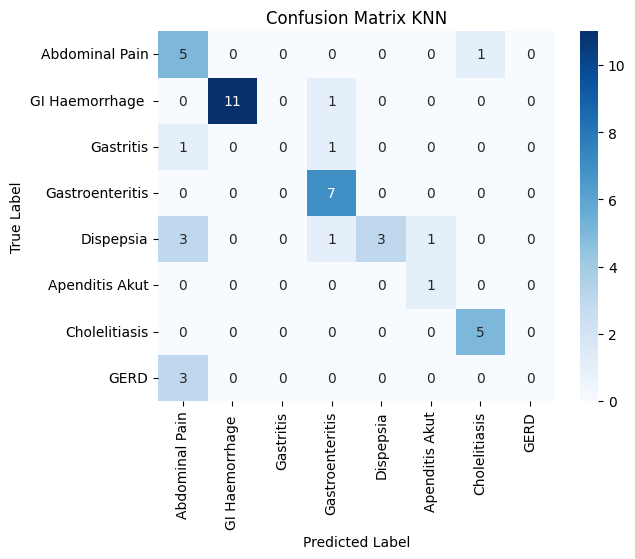

In [173]:
modelKNN = KNN(n_neighbors=14, metric="hamming")
modelKNN.fit(X_train, y_train)
y_predict = modelKNN.predict(X_test)

cm_test = confusion_matrix(y_test, y_predict)

sns.heatmap(cm_test, annot=True, cmap="Blues", xticklabels=df["Diagnosa_Utama"].unique(), yticklabels=df["Diagnosa_Utama"].unique())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix KNN")
plt.show()

In [174]:
print(classification_report(y_test, y_predict, target_names=[str(i+1) for i in range(len(df["Diagnosa_Utama"].unique()))]))

              precision    recall  f1-score   support

           1       0.42      0.83      0.56         6
           2       1.00      0.92      0.96        12
           3       0.00      0.00      0.00         2
           4       0.70      1.00      0.82         7
           5       1.00      0.38      0.55         8
           6       0.50      1.00      0.67         1
           7       0.83      1.00      0.91         5
           8       0.00      0.00      0.00         3

    accuracy                           0.73        44
   macro avg       0.56      0.64      0.56        44
weighted avg       0.73      0.73      0.69        44



c:\Users\Rizal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rizal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rizal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Lalu kita akan membandingkan ketika menggunakan metode MKNN

In [175]:
accuracy = {}
for k in range(3, 15):
    modelMKNN = MKNN(n_neighbors=k)
    modelMKNN.fit(X_train, y_train)
    y_predict = modelMKNN.predict(X_test)
    accuracy[k] = accuracy_score(y_test, y_predict)

accuracy

{3: 0.6818181818181818,
 4: 0.6818181818181818,
 5: 0.6818181818181818,
 6: 0.6590909090909091,
 7: 0.6363636363636364,
 8: 0.6818181818181818,
 9: 0.6590909090909091,
 10: 0.6818181818181818,
 11: 0.6818181818181818,
 12: 0.7045454545454546,
 13: 0.6818181818181818,
 14: 0.6818181818181818}

berdasarkan dari nilai akurasi *k* yang paling besar adalah *k=12*

In [177]:
modelMKNN = MKNN(n_neighbors=12, metric="cosine")
modelMKNN.fit(X_train, y_train)
y_predict = modelMKNN.predict(X_test)
print("cosine", accuracy_score(y_test, y_predict))


modelMKNN = MKNN(n_neighbors=12, metric="hamming")
modelMKNN.fit(X_train, y_train)
y_predict = modelMKNN.predict(X_test)
print("hamming",accuracy_score(y_test, y_predict))

cosine 0.38636363636363635
hamming 0.7045454545454546


dikarenakan hasilnya tidak lebih besar daripada menggunakan metric jaccard distance, maka kita bisa mengabaikannya saja.

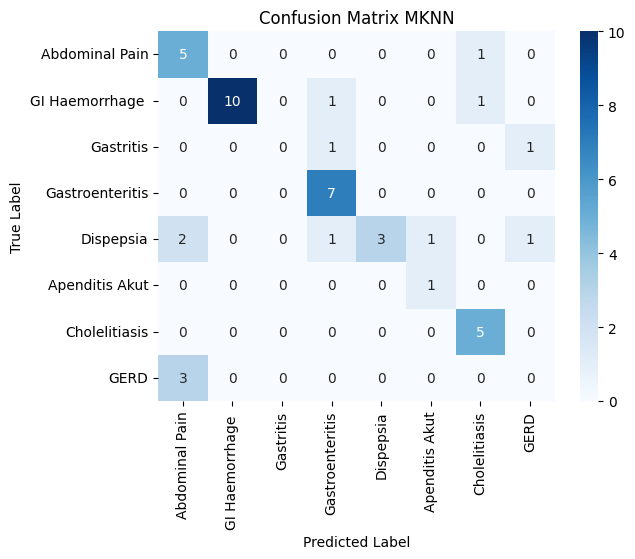

In [178]:
modelMKNN = MKNN(n_neighbors=12)
modelMKNN.fit(X_train, y_train)
y_predict = modelMKNN.predict(X_test)

cm_test = confusion_matrix(y_test, y_predict)

sns.heatmap(cm_test, annot=True, cmap="Blues", xticklabels=df["Diagnosa_Utama"].unique(), yticklabels=df["Diagnosa_Utama"].unique())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix MKNN")
plt.show()

In [179]:
print(classification_report(y_test, y_predict, target_names=[str(i+1) for i in range(len(df["Diagnosa_Utama"].unique()))]))

              precision    recall  f1-score   support

           1       0.50      0.83      0.62         6
           2       1.00      0.83      0.91        12
           3       0.00      0.00      0.00         2
           4       0.70      1.00      0.82         7
           5       1.00      0.38      0.55         8
           6       0.50      1.00      0.67         1
           7       0.71      1.00      0.83         5
           8       0.00      0.00      0.00         3

    accuracy                           0.70        44
   macro avg       0.55      0.63      0.55        44
weighted avg       0.73      0.70      0.67        44



c:\Users\Rizal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rizal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rizal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Setelah itu kita akan menyimpan data trainnya ke dalam bentuk file agar bisa melakukan training pada file yang lain

In [170]:
# menyimpan pandas collections
X_train.to_csv("model/x-train.csv", index=False)
y_train.to_csv("model/y-train.csv", index=False)

In [171]:
test = pd.Series([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1])

print(modelMKNN.predict(test))

4
